In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

<h1> Question 4.3 <h1>

In [2]:
#read in the data
df = pd.read_csv('homework5_solar_data.csv')

In [3]:
df.head()

,tot_heat,insolation,east,south,north,time
0,264.0,748.45,36.50,36.19,16.46,14.11
1,238.8,684.45,34.66,3731.00,17.66,15.68
2,230.7,827.80,33.13,32.52,17.50,10.53
3,251.6,860.45,35.75,33.71,16.40,11.00
4,257.9,875.15,34.46,34.14,16.28,11.31


In [4]:
#fit a simple linear regression model to the data
y = df["tot_heat"]
X = sm.add_constant(df["north"])
model = sm.OLS(y,X).fit()
predictions = model.predict(X)
residuals = model.resid

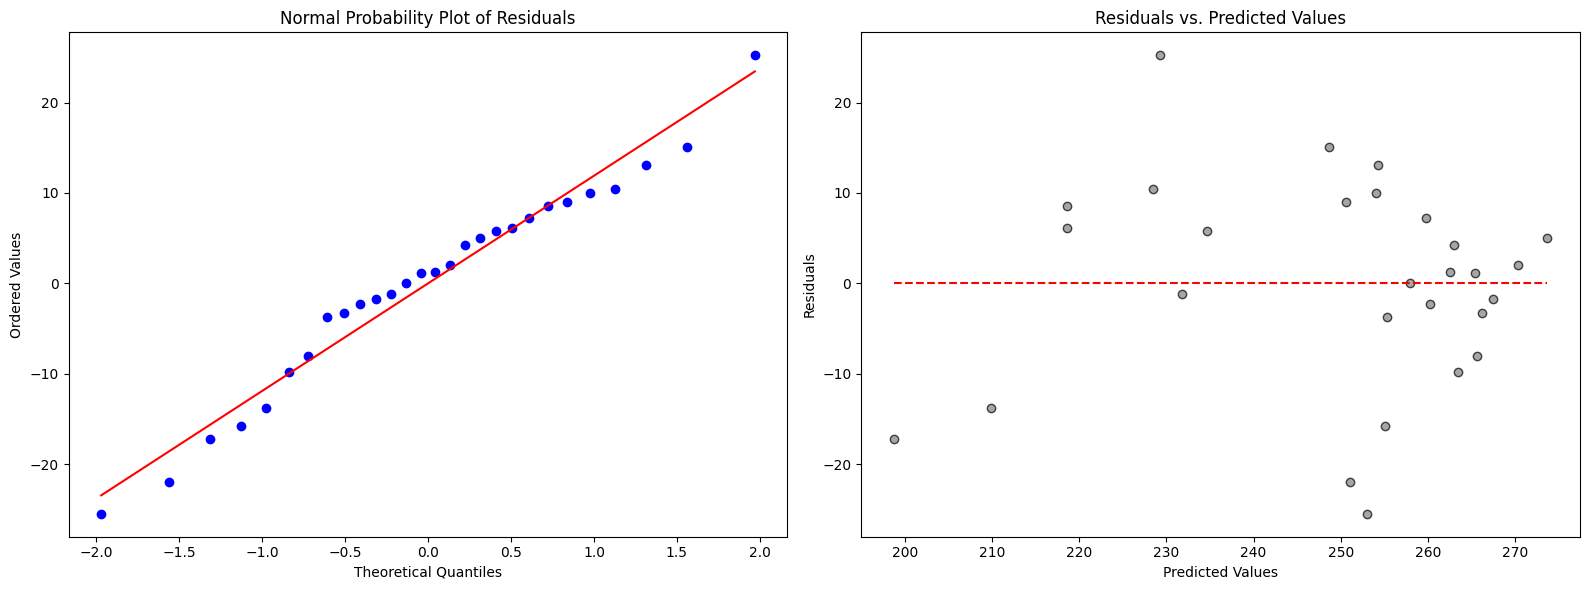

In [5]:
#construct a normal probability plot of the residuals

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# First plot: Normal Probability Plot of Residuals.
stats.probplot(model.resid, dist="norm", plot=axs[0])
axs[0].set_title('Normal Probability Plot of Residuals')
axs[0].set_xlabel('Theoretical Quantiles')
axs[0].set_ylabel('Ordered Values')

# Second plot: Residuals vs. Predicted Values.
axs[1].scatter(predictions, residuals, edgecolor='k', facecolor='grey', alpha=0.7)
axs[1].hlines(y=0, xmin=min(predictions), xmax=max(predictions), color='red', linestyle='--')
axs[1].set_title('Residuals vs. Predicted Values')
axs[1].set_xlabel('Predicted Values')
axs[1].set_ylabel('Residuals')

# Improve layout and show plot.
plt.tight_layout()
plt.show()

<h1> Interpretation <h1>
<h2>
Part a:
<h2>
<h4>
    From the Normal Probability Plot of the residuals (QQ plot) we can visually asses that the residuals are holding to some level of normality. There is a concentration of residuals about the point 0.0 on the X axis (Theoretical ideal for a normal distribution on this graph can be visualized by first placing points on a standard normal distribution density curve at regular intervals with respect to spacing on the curve itself. Then projecting those regularly spaced points onto the x axis. This will show an increase in density of projected points as you approach the x values under the peak of the normal curve). This is accompanied by a sample size that is large enough, >20 according to our text (pg. 144), to be a stable plot bolstering this conclusion. 
<h2>
Part b:
<h2>
<h4>	
    As for the residuals vs. predicted values plot we can see that there is a concentration of points in the higher range of the predicted values. This does not necessarily mean that the plot is out of expectation and the model is defective, however, more predicted values in the lower range would yield a better assessment of model fit.
<h4> 

<h1>Question 4.4<h1>

In [6]:
from statsmodels.stats.outliers_influence import OLSInfluence

In [7]:
df2 = pd.read_csv('homework5_fuel_data.csv')

In [8]:
df2

,Automobile,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,Apollo,18.90,350.0,165,260.0,8.0:1,2.56:1,4,3,200.3,69.9,3910,A
1,Omega,17.00,350.0,170,275.0,8.5:1,2.56:1,4,3,199.6,72.9,2860,A
2,Nova,20.00,250.0,105,185.0,8.25:1,2.73:1,1,3,196.7,72.2,3510,A
3,Monarch,18.25,351.0,143,255.0,8.0:1,3.00:1,2,3,199.9,74.0,3890,A
4,Duster,20.07,225.0,95,170.0,8.4:1,2.76:1,1,3,194.1,71.8,3365,M
5,Jenson Conv.,11.20,440.0,215,330.0,8.2:1,2.88:1,4,3,184.5,69.0,4215,A
6,Skyhawk,22.12,231.0,110,175.0,8.0:1,2.56:1,2,3,179.3,65.4,3020,A
7,Monza,21.47,262.0,110,200.0,8.5:1,2.56:1,2,3,179.3,65.4,3180,A
8,Scirocco,34.70,89.7,70,81.0,8.2:1,3.90:1,2,4,155.7,64.0,1905,M
9,Corolla SR-5,30.40,96.9,75,83.0,9.0:1,4.30:1,2,5,165.2,65.0,2320,M


In [9]:
model2 = sm.OLS(df2['Y'],df2[['X1','X6']]).fit()
residuals2 = model2.resid
predictions2 = model2.predict(df2[['X1','X6']])
influence = OLSInfluence(model2)
press_resids = influence.resid_press
Rstzd_resids = influence.get_resid_studentized_external()

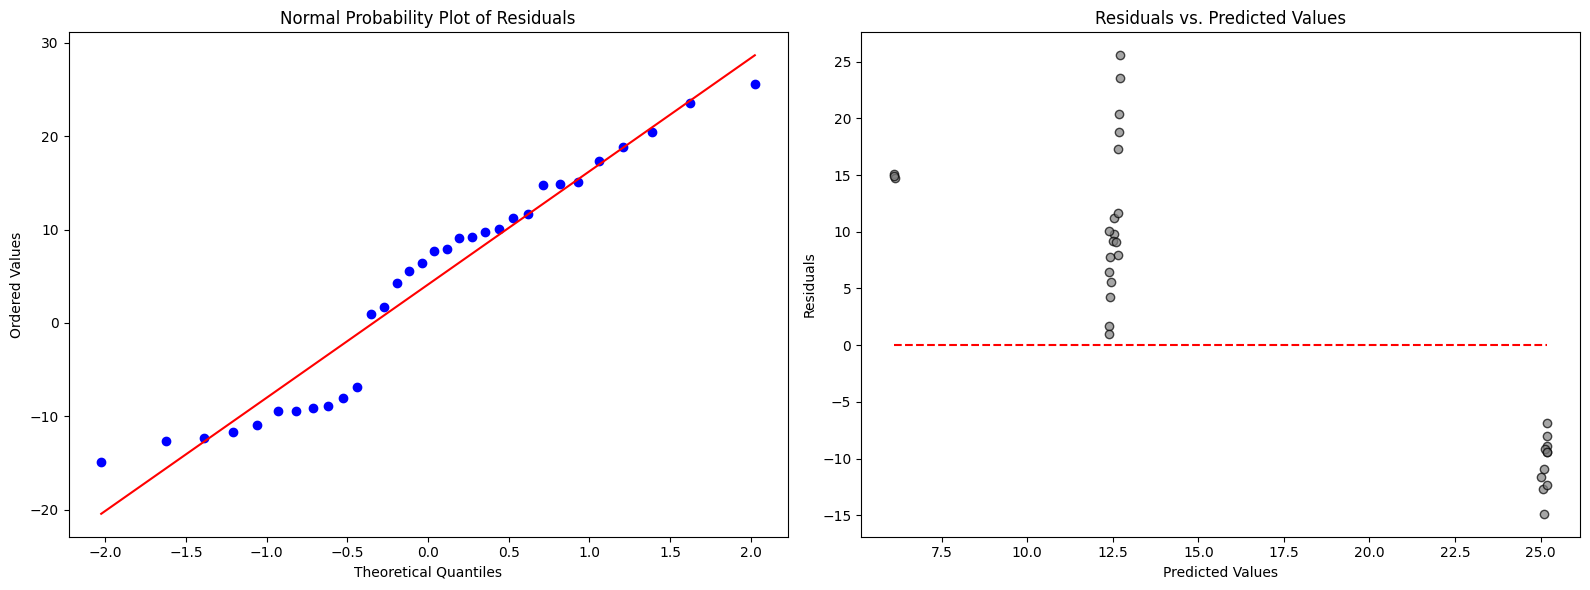

In [10]:
#construct a normal probability plot of the residuals

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# First plot: Normal Probability Plot of Residuals.
stats.probplot(press_resids, dist="norm", plot=axs[0])
axs[0].set_title('Normal Probability Plot of Residuals')
axs[0].set_xlabel('Theoretical Quantiles')
axs[0].set_ylabel('Ordered Values')

# Second plot: Residuals vs. Predicted Values.
axs[1].scatter(predictions2, press_resids, edgecolor='k', facecolor='grey', alpha=0.7)
axs[1].hlines(y=0, xmin=min(predictions2), xmax=max(predictions2), color='red', linestyle='--')
axs[1].set_title('Residuals vs. Predicted Values')
axs[1].set_xlabel('Predicted Values')
axs[1].set_ylabel('Residuals')

# Improve layout and show plot.
plt.tight_layout()
plt.show()

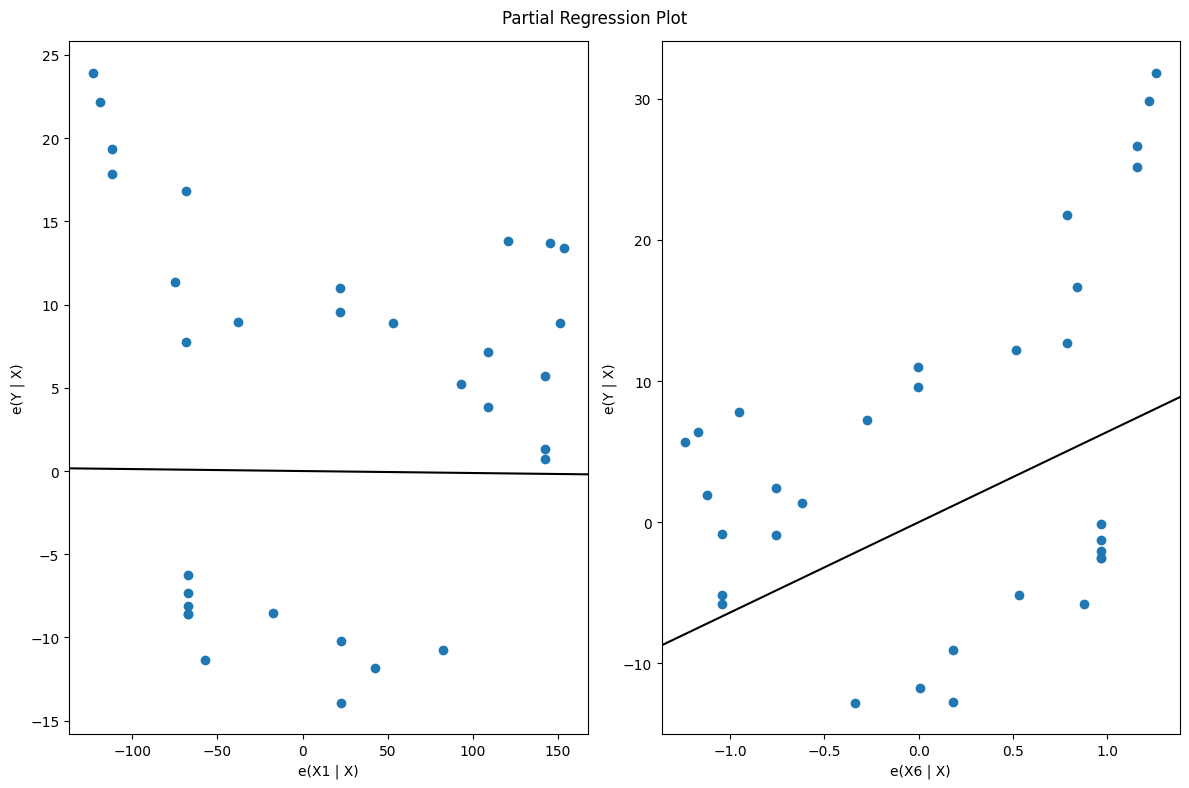

In [11]:
from statsmodels.graphics.regressionplots import plot_partregress_grid

fig = plt.figure(figsize=(12, 8))
plot_partregress_grid(model2, fig=fig)
plt.tight_layout()
plt.show()



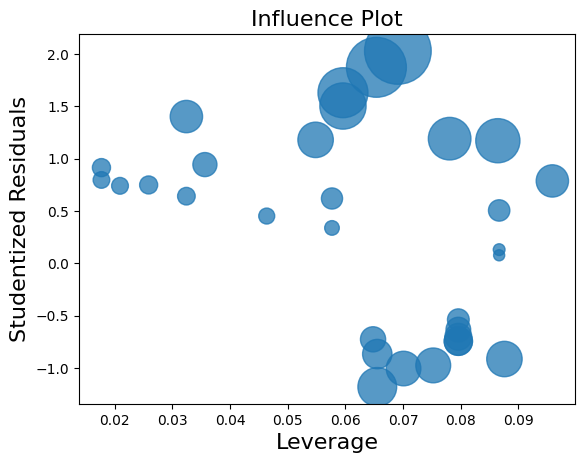

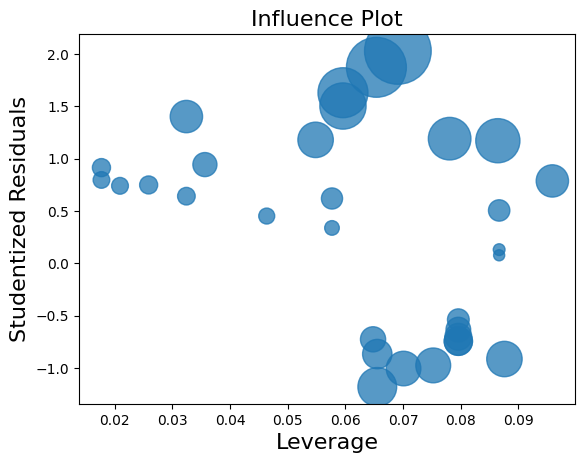

In [12]:
influence.plot_influence()

In [18]:
press_resids

0     -6.841753
1     -8.906065
2     15.069346
3      6.415349
4     14.741412
5    -14.865047
6      9.760068
7      9.212444
8     23.539770
9     18.831127
10    -9.449304
11    25.562004
12     9.086562
13    14.889258
14     7.916678
15     5.611506
16   -11.650529
17   -10.916267
18    -8.036881
19     4.223918
20    11.205620
21    10.054186
22    -9.140406
23    20.426158
24    17.321517
25   -12.686494
26    11.668216
27     7.747117
28     1.652518
29     0.962728
30   -12.344132
31    -9.449304
dtype: float64

In [14]:
Rstzd_resids

0    -0.540323
1    -0.703351
2     1.191067
3     0.504695
4     1.179751
5    -1.182891
6     0.796301
7     0.748482
8     1.873337
9     1.503260
10   -0.746253
11    2.030212
12    0.740135
13    1.171483
14    0.641040
15    0.451098
16   -0.916087
17   -0.868666
18   -0.634707
19    0.337530
20    0.914240
21    0.786955
22   -0.727637
23    1.630589
24    1.402581
25   -1.007067
26    0.943244
27    0.619067
28    0.130003
29    0.075738
30   -0.977174
31   -0.746253
dtype: float64